In [ ]:
import wave
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/hackathon_data/'

In [ ]:
cd $data_path

/content/drive/MyDrive/hackathon_data


In [ ]:
!unzip Validation_Hackathon.zip

Archive:  Validation_Hackathon.zip
  inflating: Validation_Hackathon/demographic_info.txt  
  inflating: Validation_Hackathon/patient_diagnosis.csv  
   creating: Validation_Hackathon/val_Data/
  inflating: Validation_Hackathon/val_Data/110_1b1_Pr_sc_Meditron.txt  
  inflating: Validation_Hackathon/val_Data/110_1b1_Pr_sc_Meditron.wav  
  inflating: Validation_Hackathon/val_Data/110_1p1_Al_sc_Meditron.txt  
  inflating: Validation_Hackathon/val_Data/110_1p1_Al_sc_Meditron.wav  
  inflating: Validation_Hackathon/val_Data/110_1p1_Ll_sc_Meditron.txt  
  inflating: Validation_Hackathon/val_Data/110_1p1_Ll_sc_Meditron.wav  
  inflating: Validation_Hackathon/val_Data/110_1p1_Lr_sc_Meditron.txt  
  inflating: Validation_Hackathon/val_Data/110_1p1_Lr_sc_Meditron.wav  
  inflating: Validation_Hackathon/val_Data/110_1p1_Pr_sc_Meditron.txt  
  inflating: Validation_Hackathon/val_Data/110_1p1_Pr_sc_Meditron.wav  
  inflating: Validation_Hackathon/val_Data/111_1b2_Tc_sc_Meditron.txt  
  inflating: V

### Training

In [ ]:
dataset_path = '/content/drive/MyDrive/hackathon_data/Hackathon_AIOSP2022/'

### Validation

In [ ]:
dataset_path_val = '/content/drive/MyDrive/hackathon_data/Validation_Hackathon/'

###diagnosis data of training

In [ ]:
df_no_diagnosis = pd.read_csv(dataset_path + 'demographic_info.txt', names =
                 ['Patient number', 'Age', 'Sex' , 'Adult BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
                 delimiter = ' ')

diagnosis = pd.read_csv(dataset_path + 'Patient_diagnosis (3).csv', names = ['Patient number', 'Diagnosis'])

###diagnosis data of validation

In [ ]:
df_no_diagnosis_val = pd.read_csv(dataset_path_val + 'demographic_info.txt', names =
                 ['Patient number', 'Age', 'Sex' , 'Adult BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
                 delimiter = ' ')

diagnosis_val = pd.read_csv('/content/drive/MyDrive/hackathon_data/Validation_Hackathon/' + 'patient_diagnosis.csv', names = ['Patient number', 'Diagnosis'])

In [ ]:
df =  df_no_diagnosis.join(diagnosis.set_index('Patient number'), on = 'Patient number', how = 'left')
df['Diagnosis'].value_counts()

COPD              46
Healthy           23
URTI              10
Pneumonia          6
Bronchiolitis      5
Bronchiectasis     4
Asthma             1
LRTI               1
Name: Diagnosis, dtype: int64

In [ ]:
df_val =  df_no_diagnosis_val.join(diagnosis_val.set_index('Patient number'), on = 'Patient number', how = 'left')
df_val['Diagnosis'].value_counts()

COPD              8
Healthy           3
Bronchiectasis    2
URTI              2
Bronchiolitis     1
Name: Diagnosis, dtype: int64

In [ ]:
root = dataset_path + 'audio_and_txt_files/'
filenames = [s.split('.')[0] for s in sorted(os.listdir(path = root)) if '.txt' in s]
filenames

In [ ]:
def extract_annotation_data(file_name, root):
    tokens = file_name.split('_')
    recording_info = pd.DataFrame(data = [tokens], columns = ['Patient number', 'Recording index', 'Chest location','Acquisition mode','Recording equipment'])
    recording_annotations = pd.read_csv(os.path.join(root, file_name + '.txt'), names = ['Start', 'End', 'Crackles', 'Wheezes'], delimiter= '\t')
    return (recording_info, recording_annotations)

In [ ]:
i_list = []
rec_annotations = []
rec_annotations_dict = {}
for s in filenames:
    (i,a) = extract_annotation_data(s, root)
    i_list.append(i)
    rec_annotations.append(a)
    rec_annotations_dict[s] = a
recording_info = pd.concat(i_list, axis = 0)
recording_info

,Patient number,Recording index,Chest location,Acquisition mode,Recording equipment
0,101,1b1,Al,sc,Meditron
0,101,1b1,Pr,sc,Meditron
0,102,1b1,Ar,sc,Meditron
0,103,2b2,Ar,mc,LittC2SE
0,104,1b1,Al,sc,Litt3200
...,...,...,...,...,...
0,224,1b2,Al,sc,Meditron
0,225,1b1,Pl,sc,Meditron
0,226,1b1,Al,sc,Meditron
0,226,1b1,Ll,sc,Meditron


**Checking for crackles and wheezes.**


In [ ]:
no_label_list = []
crack_list = []
wheeze_list = []
both_sym_list = []
filename_list = []
for f in filenames:
    d = rec_annotations_dict[f]
    no_labels = len(d[(d['Crackles'] == 0) & (d['Wheezes'] == 0)].index)
    n_crackles = len(d[(d['Crackles'] == 1) & (d['Wheezes'] == 0)].index)
    n_wheezes = len(d[(d['Crackles'] == 0) & (d['Wheezes'] == 1)].index)
    both_sym = len(d[(d['Crackles'] == 1) & (d['Wheezes'] == 1)].index)
    no_label_list.append(no_labels)
    # print(filename_list)
    crack_list.append(n_crackles)
    wheeze_list.append(n_wheezes)
    both_sym_list.append(both_sym)
    filename_list.append(f)

In [ ]:
print(len(crack_list), len(no_label_list), len(wheeze_list),len(both_sym_list),len(filename_list))

724 724 724 724 724


In [ ]:
file_label_df = pd.DataFrame(data = {'filename':filename_list, 'no label':no_label_list, 'crackles only':crack_list, 'wheezes only':wheeze_list, 'crackles and wheezees':both_sym_list})

In [ ]:
file_label_df

,filename,no label,crackles only,wheezes only,crackles and wheezees
0,101_1b1_Al_sc_Meditron,12,0,0,0
1,101_1b1_Pr_sc_Meditron,11,0,0,0
2,102_1b1_Ar_sc_Meditron,13,0,0,0
3,103_2b2_Ar_mc_LittC2SE,2,0,4,0
4,104_1b1_Al_sc_Litt3200,6,0,0,0
...,...,...,...,...,...
719,224_1b2_Al_sc_Meditron,7,0,0,0
720,225_1b1_Pl_sc_Meditron,14,0,0,0
721,226_1b1_Al_sc_Meditron,8,2,0,0
722,226_1b1_Ll_sc_Meditron,4,6,0,0


In [ ]:
w_labels = file_label_df[(file_label_df['crackles only'] != 0) | (file_label_df['wheezes only'] != 0) | (file_label_df['crackles and wheezees'] != 0)]
file_label_df.sum()

filename                 101_1b1_Al_sc_Meditron101_1b1_Pr_sc_Meditron10...
no label                                                              2803
crackles only                                                         1585
wheezes only                                                           713
crackles and wheezees                                                  419
dtype: object

In [ ]:
import wave
import math
import scipy.io.wavfile as wf
#wave file reader

#Will resample all files to the target sample rate and produce a 32bit float array
def read_wav_file(str_filename, target_rate):
    wav = wave.open(str_filename, mode = 'r')
    (sample_rate, data) = extract2FloatArr(wav,str_filename)

    if (sample_rate != target_rate):
        ( _ , data) = resample(sample_rate, data, target_rate)

    wav.close()
    return (target_rate, data.astype(np.float32))

def resample(current_rate, data, target_rate):
    x_original = np.linspace(0,100,len(data))
    x_resampled = np.linspace(0,100, int(len(data) * (target_rate / current_rate)))
    resampled = np.interp(x_resampled, x_original, data)
    return (target_rate, resampled.astype(np.float32))

# -> (sample_rate, data)
def extract2FloatArr(lp_wave, str_filename):
    (bps, channels) = bitrate_channels(lp_wave)

    if bps in [1,2,4]:
        (rate, data) = wf.read(str_filename)
        divisor_dict = {1:255, 2:32768}
        if bps in [1,2]:
            divisor = divisor_dict[bps]
            data = np.divide(data, float(divisor)) #clamp to [0.0,1.0]
        return (rate, data)

    elif bps == 3:
        #24bpp wave
        return read24bitwave(lp_wave)

    else:
        raise Exception('Unrecognized wave format: {} bytes per sample'.format(bps))

#Note: This function truncates the 24 bit samples to 16 bits of precision
#Reads a wave object returned by the wave.read() method
#Returns the sample rate, as well as the audio in the form of a 32 bit float numpy array
#(sample_rate:float, audio_data: float[])
def read24bitwave(lp_wave):
    nFrames = lp_wave.getnframes()
    buf = lp_wave.readframes(nFrames)
    reshaped = np.frombuffer(buf, np.int8).reshape(nFrames,-1)
    short_output = np.empty((nFrames, 2), dtype = np.int8)
    short_output[:,:] = reshaped[:, -2:]
    short_output = short_output.view(np.int16)
    return (lp_wave.getframerate(), np.divide(short_output, 32768).reshape(-1))  #return numpy array to save memory via array slicing

def bitrate_channels(lp_wave):
    bps = (lp_wave.getsampwidth() / lp_wave.getnchannels()) #bytes per sample
    return (bps, lp_wave.getnchannels())

def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data)
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

**Distribution of respiratory cycle length**

longest cycle:16.163
shortest cycle:0.1999999999999993
Fraction of samples less than 5 seconds:0.9733695652173913


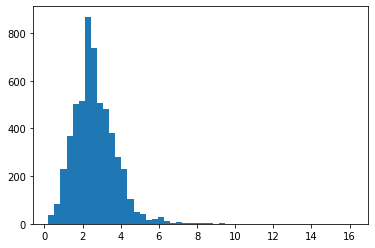

In [ ]:
duration_list = []
for i in range(len(rec_annotations)):
    current = rec_annotations[i]
    duration = current['End'] - current['Start']
    duration_list.extend(duration)

duration_list = np.array(duration_list)
plt.hist(duration_list, bins = 50)
print('longest cycle:{}'.format(max(duration_list)))
print('shortest cycle:{}'.format(min(duration_list)))
threshold = 5
print('Fraction of samples less than {} seconds:{}'.format(threshold,np.sum(duration_list < threshold)/len(duration_list)))

**Mel Spectrogram with(VLTP)**


In [ ]:
import scipy.signal

#vtlp_params = (alpha, f_high)
def sample2MelSpectrum(cycle_info, sample_rate, n_filters, vtlp_params):
    n_rows = 175 # 7500 cutoff
    n_window = 512 #~25 ms window
    (f, t, Sxx) = scipy.signal.spectrogram(cycle_info[0],fs = sample_rate, nfft= n_window, nperseg=n_window)
    Sxx = Sxx[:n_rows,:].astype(np.float32) #sift out coefficients above 7500hz, Sxx has 196 columns
    mel_log = FFT2MelSpectrogram(f[:n_rows], Sxx, sample_rate, n_filters, vtlp_params)[1]
    mel_min = np.min(mel_log)
    mel_max = np.max(mel_log)
    diff = mel_max - mel_min
    norm_mel_log = (mel_log - mel_min) / diff if (diff > 0) else np.zeros(shape = (n_filters,Sxx.shape[1]))
    if (diff == 0):
        print('Error: sample data is completely empty')
    labels = [cycle_info[1], cycle_info[2]] #crackles, wheezes flags
    return (np.reshape(norm_mel_log, (n_filters,Sxx.shape[1],1)).astype(np.float32), # 196x64x1 matrix
            label2onehot(labels))

def Freq2Mel(freq):
    return 1125 * np.log(1 + freq / 700)

def Mel2Freq(mel):
    exponents = mel / 1125
    return 700 * (np.exp(exponents) - 1)

#Tased on Jaitly & Hinton(2013)
#Takes an array of the original mel spaced frequencies and returns a warped version of them
def VTLP_shift(mel_freq, alpha, f_high, sample_rate):
    nyquist_f = sample_rate / 2
    warp_factor = min(alpha, 1)
    threshold_freq = f_high * warp_factor / alpha
    lower = mel_freq * alpha
    higher = nyquist_f - (nyquist_f - mel_freq) * ((nyquist_f - f_high * warp_factor) / (nyquist_f - f_high * (warp_factor / alpha)))

    warped_mel = np.where(mel_freq <= threshold_freq, lower, higher)
    return warped_mel.astype(np.float32)

#mel_space_freq: the mel frequencies (HZ) of the filter banks, in addition to the two maximum and minimum frequency values
#fft_bin_frequencies: the bin freqencies of the FFT output
#Generates a 2d numpy array, with each row containing each filter bank
def GenerateMelFilterBanks(mel_space_freq, fft_bin_frequencies):
    n_filters = len(mel_space_freq) - 2
    coeff = []
    #Triangular filter windows
    #ripped from http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
    for mel_index in range(n_filters):
        m = int(mel_index + 1)
        filter_bank = []
        for f in fft_bin_frequencies:
            if(f < mel_space_freq[m-1]):
                hm = 0
            elif(f < mel_space_freq[m]):
                hm = (f - mel_space_freq[m-1]) / (mel_space_freq[m] - mel_space_freq[m-1])
            elif(f < mel_space_freq[m + 1]):
                hm = (mel_space_freq[m+1] - f) / (mel_space_freq[m + 1] - mel_space_freq[m])
            else:
                hm = 0
            filter_bank.append(hm)
        coeff.append(filter_bank)
    return np.array(coeff, dtype = np.float32)

#Transform spectrogram into mel spectrogram -> (frequencies, spectrum)
#vtlp_params = (alpha, f_high), vtlp will not be applied if set to None
def FFT2MelSpectrogram(f, Sxx, sample_rate, n_filterbanks, vtlp_params = None):
    (max_mel, min_mel)  = (Freq2Mel(max(f)), Freq2Mel(min(f)))
    mel_bins = np.linspace(min_mel, max_mel, num = (n_filterbanks + 2))
    #Convert mel_bins to corresponding frequencies in hz
    mel_freq = Mel2Freq(mel_bins)

    if(vtlp_params is None):
        filter_banks = GenerateMelFilterBanks(mel_freq, f)
    else:
        #Apply VTLP
        (alpha, f_high) = vtlp_params
        warped_mel = VTLP_shift(mel_freq, alpha, f_high, sample_rate)
        filter_banks = GenerateMelFilterBanks(warped_mel, f)

    mel_spectrum = np.matmul(filter_banks, Sxx)
    return (mel_freq[1:-1], np.log10(mel_spectrum  + float(10e-12)))

#labels proved too difficult to train (model keep convergining to statistical mean)
#Flattened to onehot labels since the number of combinations is very low
def label2onehot(c_w_flags):
    c = c_w_flags[0]
    w = c_w_flags[1]
    if((c == False) & (w == False)):
        return [1,0,0,0]
    elif((c == True) & (w == False)):
        return [0,1,0,0]
    elif((c == False) & (w == True)):
        return [0,0,1,0]
    else:
        return [0,0,0,1]

**Data preparation utility functions**

In [ ]:
#Used to split each individual sound file into separate sound clips containing one respiratory cycle each
#output: [filename, (sample_data:np.array, start:float, end:float, crackles:bool(float), wheezes:bool(float)) (...) ]
def get_sound_samples(recording_annotations, file_name, root, sample_rate):
    sample_data = [file_name]
    (rate, data) = read_wav_file(os.path.join(root, file_name + '.wav'), sample_rate)

    for i in range(len(recording_annotations.index)):
        row = recording_annotations.loc[i]
        start = row['Start']
        end = row['End']
        crackles = row['Crackles']
        wheezes = row['Wheezes']
        audio_chunk = slice_data(start, end, data, rate)
        sample_data.append((audio_chunk, start,end,crackles,wheezes))
    return sample_data

#Fits each respiratory cycle into a fixed length audio clip, splits may be performed and zero padding is added if necessary
#original:(arr,c,w) -> output:[(arr,c,w),(arr,c,w)]
def split_and_pad(original, desiredLength, sampleRate):
    output_buffer_length = int(desiredLength * sampleRate)
    soundclip = original[0]
    n_samples = len(soundclip)
    total_length = n_samples / sampleRate #length of cycle in seconds
    n_slices = int(math.ceil(total_length / desiredLength)) #get the minimum number of slices needed
    samples_per_slice = n_samples // n_slices
    src_start = 0 #Staring index of the samples to copy from the original buffer
    output = [] #Holds the resultant slices
    for i in range(n_slices):
        src_end = min(src_start + samples_per_slice, n_samples)
        length = src_end - src_start
        copy = generate_padded_samples(soundclip[src_start:src_end], output_buffer_length)
        output.append((copy, original[1], original[2]))
        src_start += length
    return output

def generate_padded_samples(source, output_length):
    copy = np.zeros(output_length, dtype = np.float32)
    src_length = len(source)
    frac = src_length / output_length
    if(frac < 0.5):
        #tile forward sounds to fill empty space
        cursor = 0
        while(cursor + src_length) < output_length:
            copy[cursor:(cursor + src_length)] = source[:]
            cursor += src_length
    else:
        copy[:src_length] = source[:]
    #
    return copy

**Data augmentation**
Two basic forms employed : audio stretching (speeding up or down) as well as Vocal Tract Length perturbation

In [ ]:
#Creates a copy of each time slice, but stretches or contracts it by a random amount
def gen_time_stretch(original, sample_rate, max_percent_change):
    stretch_amount = 1 + np.random.uniform(-1,1) * (max_percent_change / 100)
    (_, stretched) = resample(sample_rate, original, int(sample_rate * stretch_amount))
    return stretched

#Same as above, but applies it to a list of samples
def augment_list(audio_with_labels, sample_rate, percent_change, n_repeats):
    augmented_samples = []
    for i in range(n_repeats):
        addition = [(gen_time_stretch(t[0], sample_rate, percent_change), t[1], t[2] ) for t in audio_with_labels]
        augmented_samples.extend(addition)
    return augmented_samples

#Takes a list of respiratory cycles, and splits and pads each cycle into fixed length buffers (determined by desiredLength(seconds))
#Then takes the split and padded sample and transforms it into a mel spectrogram
#VTLP_alpha_range = [Lower, Upper] (Bounds of random selection range),
#VTLP_high_freq_range = [Lower, Upper] (-)
#output:[(arr:float[],c:float_bool,w:float_bool),(arr,c,w)]
def split_and_pad_and_apply_mel_spect(original, desiredLength, sampleRate, VTLP_alpha_range = None, VTLP_high_freq_range = None, n_repeats = 1):
    output = []
    for i in range(n_repeats):
        for d in original:
            lst_result = split_and_pad(d, desiredLength, sampleRate) #Time domain
            if( (VTLP_alpha_range is None) | (VTLP_high_freq_range is None) ):
                #Do not apply VTLP
                VTLP_params = None
            else:
                #Randomly generate VLTP parameters
                alpha = np.random.uniform(VTLP_alpha_range[0], VTLP_alpha_range[1])
                high_freq = np.random.uniform(VTLP_high_freq_range[0], VTLP_high_freq_range[1])
                VTLP_params = (alpha, high_freq)
            freq_result = [sample2MelSpectrum(d, sampleRate, 50, VTLP_params) for d in lst_result] #Freq domain
            output.extend(freq_result)
    return output

163


Text(0.5, 1.0, 'With VTLP')

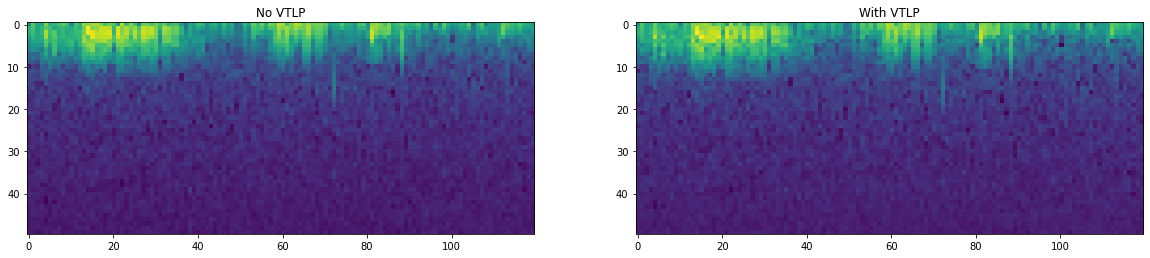

In [ ]:
str_file = filenames[11]
lp_test = get_sound_samples(rec_annotations_dict[str_file], str_file, root, 22000)
lp_cycles = [(d[0], d[3], d[4]) for d in lp_test[1:]]
soundclip = lp_cycles[1][0]

n_window = 512
sample_rate = 22000
(f, t, Sxx) = scipy.signal.spectrogram(soundclip, fs = 22000, nfft= n_window, nperseg=n_window)
print(sum(f < 7000))

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
mel_banks = FFT2MelSpectrogram(f[:175], Sxx[:175,:], sample_rate, 50)[1]
plt.imshow(mel_banks, aspect = 1)
plt.title('No VTLP')

plt.subplot(1,2,2)
mel_banks = FFT2MelSpectrogram(f[:175], Sxx[:175,:], sample_rate, 50, vtlp_params = (0.9,3500))[1]
plt.imshow(mel_banks, aspect = 1)
plt.title('With VTLP')

In [ ]:
from sklearn.model_selection import train_test_split

def extract_all_training_samples(filenames, annotation_dict, root, target_rate, desired_length, train_test_ratio = 0.10):
    cycle_list = []
    for file in filenames:
        data = get_sound_samples(annotation_dict[file], file, root, target_rate)
        cycles_with_labels = [(d[0], d[3], d[4]) for d in data[1:]]
        cycle_list.extend(cycles_with_labels)

    #Sort into respective classes
    no_labels = [c for c in cycle_list if ((c[1] == 0) & (c[2] == 0))]
    c_only = [c for c in cycle_list if ((c[1] == 1) & (c[2] == 0))]
    w_only = [c for c in cycle_list if ((c[1] == 0) & (c[2] == 1))]
    c_w = [c for c in cycle_list if ((c[1] == 1) & (c[2] == 1))]

    #Count of labels across all cycles, actual recording time also follows similar ratios
    # no label   2803
    # crackles only  1585
    # wheezes only    713
    # crackles and wheezees 419
    none_train, none_test = train_test_split(no_labels, test_size = train_test_ratio)
    c_train, c_test  = train_test_split(c_only, test_size = train_test_ratio)
    w_train, w_test  = train_test_split(w_only, test_size = train_test_ratio)
    c_w_train, c_w_test  = train_test_split(c_w, test_size = train_test_ratio)

    #Training section (Data augmentation procedures)
    #Augment w_only and c_w groups to match the size of c_only
    #no_labels will be artifically reduced in the pipeline  later
    w_stretch = w_train + augment_list(w_train, target_rate, 10 , 1) #
    c_w_stretch = c_w_train + augment_list(c_w_train , target_rate, 10 , 1)

    #Split up cycles into sound clips with fixed lengths so they can be fed into a CNN
    vtlp_alpha = [0.9,1.1]
    vtlp_upper_freq = [3200,3800]

    train_none  = (split_and_pad_and_apply_mel_spect(none_train, desired_length, target_rate) +
                   split_and_pad_and_apply_mel_spect(none_train, desired_length, target_rate, vtlp_alpha))

    train_c = (split_and_pad_and_apply_mel_spect(c_train, desired_length, target_rate) +
               split_and_pad_and_apply_mel_spect(c_train, desired_length, target_rate, vtlp_alpha, vtlp_upper_freq, n_repeats = 3) ) #original samples + VTLP

    train_w = (split_and_pad_and_apply_mel_spect(w_stretch, desired_length, target_rate) +
               split_and_pad_and_apply_mel_spect(w_stretch , desired_length, target_rate, vtlp_alpha , vtlp_upper_freq, n_repeats = 4)) #(original samples + time stretch) + VTLP

    train_c_w = (split_and_pad_and_apply_mel_spect(c_w_stretch, desired_length, target_rate) +
                 split_and_pad_and_apply_mel_spect(c_w_stretch, desired_length, target_rate, vtlp_alpha , vtlp_upper_freq, n_repeats = 7)) #(original samples + time stretch * 2) + VTLP

    train_dict = {'none':train_none,'crackles':train_c,'wheezes':train_w, 'both':train_c_w}

    #test section
    test_none  = split_and_pad_and_apply_mel_spect(none_test, desired_length, target_rate)
    test_c = split_and_pad_and_apply_mel_spect(c_test, desired_length, target_rate)
    test_w = split_and_pad_and_apply_mel_spect(w_test, desired_length, target_rate)
    test_c_w = split_and_pad_and_apply_mel_spect(c_w_test, desired_length, target_rate)

    test_dict = {'none':test_none,'crackles':test_c,'wheezes':test_w, 'both':test_c_w}

    return [train_dict, test_dict]
print(extract_all_training_samples)

<function extract_all_training_samples at 0x7f371a46d050>


#Validation

In [ ]:
from sklearn.model_selection import train_test_split

def extract_all_training_samples(filenames, annotation_dict, root, target_rate, desired_length):
    cycle_list = []
    for file in filenames:
        data = get_sound_samples(annotation_dict[file], file, root, target_rate)
        cycles_with_labels = [(d[0], d[3], d[4]) for d in data[1:]]
        cycle_list.extend(cycles_with_labels)

    #Sort into respective classes
    no_labels = [c for c in cycle_list if ((c[1] == 0) & (c[2] == 0))]
    c_only = [c for c in cycle_list if ((c[1] == 1) & (c[2] == 0))]
    w_only = [c for c in cycle_list if ((c[1] == 0) & (c[2] == 1))]
    c_w = [c for c in cycle_list if ((c[1] == 1) & (c[2] == 1))]

    #Count of labels across all cycles, actual recording time also follows similar ratios
    # no label   2803
    # crackles only  1585
    # wheezes only    713
    # crackles and wheezees 419
    none_train = no_labels
    c_train =c_only
    w_train = w_only
    c_w_train = c_w

    #Training section (Data augmentation procedures)
    #Augment w_only and c_w groups to match the size of c_only
    #no_labels will be artifically reduced in the pipeline  later
    w_stretch = w_train + augment_list(w_train, target_rate, 10 , 1) #
    c_w_stretch = c_w_train + augment_list(c_w_train , target_rate, 10 , 1)

    #Split up cycles into sound clips with fixed lengths so they can be fed into a CNN
    vtlp_alpha = [0.9,1.1]
    vtlp_upper_freq = [3200,3800]

    train_none  = (split_and_pad_and_apply_mel_spect(none_train, desired_length, target_rate) +
                   split_and_pad_and_apply_mel_spect(none_train, desired_length, target_rate, vtlp_alpha))

    train_c = (split_and_pad_and_apply_mel_spect(c_train, desired_length, target_rate) +
               split_and_pad_and_apply_mel_spect(c_train, desired_length, target_rate, vtlp_alpha, vtlp_upper_freq, n_repeats = 3) ) #original samples + VTLP

    train_w = (split_and_pad_and_apply_mel_spect(w_stretch, desired_length, target_rate) +
               split_and_pad_and_apply_mel_spect(w_stretch , desired_length, target_rate, vtlp_alpha , vtlp_upper_freq, n_repeats = 4)) #(original samples + time stretch) + VTLP

    train_c_w = (split_and_pad_and_apply_mel_spect(c_w_stretch, desired_length, target_rate) +
                 split_and_pad_and_apply_mel_spect(c_w_stretch, desired_length, target_rate, vtlp_alpha , vtlp_upper_freq, n_repeats = 7)) #(original samples + time stretch * 2) + VTLP

    train_dict = {'none':train_none,'crackles':train_c,'wheezes':train_w, 'both':train_c_w}

    #test section
    test_none  = split_and_pad_and_apply_mel_spect(none_test, desired_length, target_rate)
    test_c = split_and_pad_and_apply_mel_spect(c_test, desired_length, target_rate)
    test_w = split_and_pad_and_apply_mel_spect(w_test, desired_length, target_rate)
    test_c_w = split_and_pad_and_apply_mel_spect(c_w_test, desired_length, target_rate)

    test_dict = {'none':test_none,'crackles':test_c,'wheezes':test_w, 'both':test_c_w}

    return [train_dict, test_dict]
print(extract_all_training_samples)

In [ ]:
target_sample_rate = 22000
sample_length_seconds = 3
sample_dict = extract_all_training_samples(filenames, rec_annotations_dict, root, target_sample_rate, sample_length_seconds) #sample rate lowered to meet memory constraints
training_clips = sample_dict[0]
test_clips = sample_dict[1]

In [ ]:
def print_sample_count(src_dict):
    print('none:{}\ncrackles:{}\nwheezes:{}\nboth:{}'.format(len(src_dict['none']),
                                                        len(src_dict['crackles']),

                                                        len(src_dict['wheezes']),
                                                        len(src_dict['both'])))

print('Samples Available')
print('[Training set]')
print_sample_count(training_clips)
print('')
print('[Test set]')
print_sample_count(test_clips)

Samples Available
[Training set]
none:6588
crackles:7840
wheezes:8555
both:8592

[Test set]
none:366
crackles:213
wheezes:97
both:62


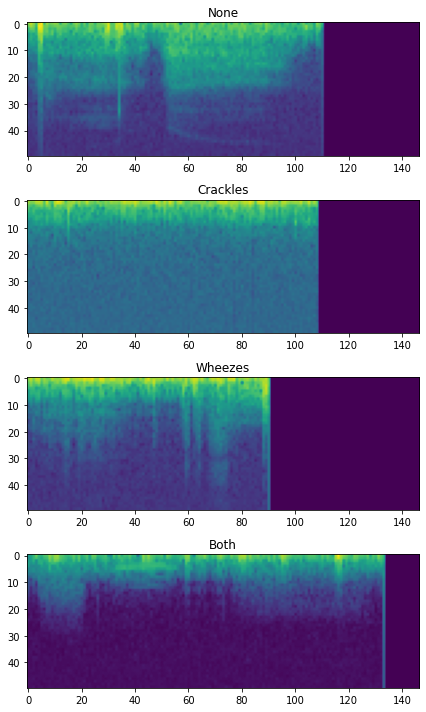

In [ ]:
#Example of tiled sound samples
sample_height = training_clips['none'][0][0].shape[0]
sample_width = training_clips['none'][0][0].shape[1]
ind = 1
plt.figure(figsize = (10,10))
plt.subplot(4,1,1)
plt.imshow(training_clips['none'][ind][0].reshape(sample_height, sample_width))
plt.title('None')
plt.subplot(4,1,2)
plt.imshow(training_clips['crackles'][ind][0].reshape(sample_height, sample_width))
plt.title('Crackles')
plt.subplot(4,1,3)
plt.imshow(training_clips['wheezes'][ind][0].reshape(sample_height, sample_width))
plt.title('Wheezes')
plt.subplot(4,1,4)
plt.imshow(training_clips['both'][ind][0].reshape(sample_height, sample_width))
plt.title('Both')
plt.tight_layout()

**Data Pipeline**

In [ ]:
import scipy.signal

#Interleaved sampling between classes
#Used to ensure a balance of classes for the training set
class data_generator():
    #sound_clips = [[none],[crackles],[wheezes],[both]]
    #strides: How far the sampling index for each category is advanced for each step
    def __init__(self, sound_clips, strides):
        self.clips = sound_clips
        self.strides = strides
        self.lengths = [len(arr) for arr in sound_clips]

    def n_available_samples(self):
        return int(min(np.divide(self.lengths, self.strides))) * 4

    def generate_keras(self, batch_size):
        cursor = [0,0,0,0]
        while True:
            i = 0
            X,y = [],[]
            for c in range(batch_size):
                cat_length = self.lengths[i]
                cat_clips = self.clips[i]
                cat_stride = self.strides[i]
                cat_advance = np.random.randint(low= 1,high = cat_stride + 1)
                clip = cat_clips[(cursor[i] + cat_advance) % cat_length]
                cursor[i] = (cursor[i] + self.strides[i]) % cat_length #advance cursor
                s = (self.rollFFT(clip))
                X.append(s[0])
                y.append(s[1])
                i = (i + 1) % 4 # go to next class
            yield (np.reshape(X, (batch_size, sample_height, sample_width, 1)),
                   np.reshape(y,(batch_size,4)))

    #Transpose and wrap each array along the time axis
    def rollFFT(self, fft_info):
        fft = fft_info[0]
        n_col = fft.shape[1]
        pivot = np.random.randint(n_col)
        return ((np.roll(fft, pivot, axis = 1)), fft_info[1])

#Used for validation set
class feed_all():
    #sound_clips = [[none],[crackles],[wheezes],[both]]
    #strides: How far the sampling index for each category is advanced for each step
    def __init__(self, sound_clips, roll = True):
        merged = []
        for arr in sound_clips:
            merged.extend(arr)
        np.random.shuffle(merged)
        self.clips = merged
        self.nclips = len(merged)
        self.roll = roll

    def n_available_samples(self):
        return len(self.clips)

    def generate_keras(self, batch_size):
        i = 0
        while True:
            X,y = [],[]
            for b in range(batch_size):
                clip = self.clips[i]
                i = (i + 1) % self.nclips
                if(self.roll):
                    s = (self.rollFFT(clip))
                    X.append(s[0])
                    y.append(s[1])
                else:
                    X.append(clip[0])
                    y.append(clip[1])

            yield (np.reshape(X, (batch_size,sample_height, sample_width,1)),
                   np.reshape(y,(batch_size, 4)))

    #Transpose and wrap each array along the time axis
    def rollFFT(self, fft_info):
        fft = fft_info[0]
        n_col = fft.shape[1]
        pivot = np.random.randint(n_col)
        return ((np.roll(fft, pivot, axis = 1)), fft_info[1])

In [ ]:
[none_train, c_train, w_train, c_w_train] = [training_clips['none'], training_clips['crackles'], training_clips['wheezes'], training_clips['both']]
[none_test, c_test, w_test,c_w_test] =  [test_clips['none'], test_clips['crackles'], test_clips['wheezes'], test_clips['both']]

np.random.shuffle(none_train)
np.random.shuffle(c_train)
np.random.shuffle(w_train)
np.random.shuffle(c_w_train)

#Data pipeline objects
train_gen = data_generator([none_train, c_train, w_train, c_w_train], [1,1,1,1])
test_gen = feed_all([none_test, c_test, w_test,c_w_test])

**CNN Implementation**

In [ ]:
batch_size = 64
n_epochs = 50

In [ ]:
#Keras implementation
from keras import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
import tensorflow as tf
K.clear_session()

model = Sequential()
model.add(Conv2D(128, [7,11], strides = [2,2], padding = 'SAME', input_shape = (sample_height, sample_width, 1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [5,5], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [1,1], padding = 'SAME'))
model.add(Conv2D(256, [3,3], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME',activation = 'relu'))
model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'SAME'))
model.add(Flatten())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00, amsgrad=False)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
stats = model.fit_generator(generator = train_gen.generate_keras(batch_size),
                            steps_per_epoch = train_gen.n_available_samples() // batch_size,
                            validation_data = test_gen.generate_keras(batch_size),
                            validation_steps = test_gen.n_available_samples() // batch_size,
                            epochs = n_epochs)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


411/411 [==============================] - 25s 57ms/step - loss: 1.2633 - acc: 0.4106 - val_loss: 1.2674 - val_acc: 0.4091
Epoch 2/50
411/411 [==============================] - 24s 57ms/step - loss: 1.0471 - acc: 0.5379 - val_loss: 1.0480 - val_acc: 0.5426
Epoch 3/50
411/411 [==============================] - 24s 59ms/step - loss: 0.8904 - acc: 0.6145 - val_loss: 1.0061 - val_acc: 0.5710
Epoch 4/50
411/411 [==============================] - 24s 59ms/step - loss: 0.7816 - acc: 0.6699 - val_loss: 0.9647 - val_acc: 0.6151
Epoch 5/50
411/411 [==============================] - 24s 59ms/step - loss: 0.6829 - acc: 0.7184 - val_loss: 0.9692 - val_acc: 0.6222
Epoch 6/50
411/411 [==============================] - 24s 58ms/step - loss: 0.5996 - acc: 0.7572 - val_loss: 1.0602 - val_acc: 0.6065
Epoch 7/50
411/411 [==============================] - 24s 59ms/step - loss: 0.5242 - acc: 0.7926 - val_loss: 0.9108 - val_acc: 0.6605
Epoch 8/50
411/411 [==============================] - 24s 59ms/step - los

Text(0.5, 1.0, 'Loss')

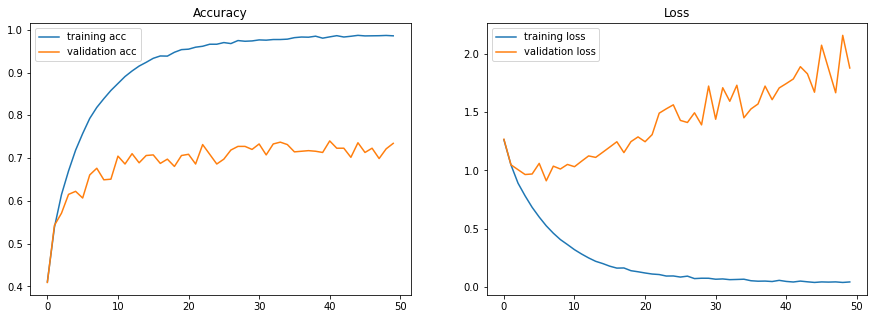

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(stats.history['acc'], label = 'training acc')
plt.plot(stats.history['val_acc'], label = 'validation acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(stats.history['loss'], label = 'training loss')
plt.plot(stats.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title('Loss')

In [ ]:
test_set = test_gen.generate_keras(test_gen.n_available_samples()).__next__()
predictions = model.predict(test_set[0])
predictions = np.argmax(predictions, axis = 1)
labels = np.argmax(test_set[1], axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(labels, predictions, target_names = ['none','crackles','wheezes','both']))
print(confusion_matrix(labels, predictions))

              precision    recall  f1-score   support

        none       0.78      0.79      0.78       366
    crackles       0.73      0.76      0.74       213
     wheezes       0.63      0.54      0.58        97
        both       0.64      0.61      0.63        62

    accuracy                           0.73       738
   macro avg       0.69      0.68      0.68       738
weighted avg       0.73      0.73      0.73       738

[[290  51  17   8]
 [ 46 162   3   2]
 [ 30   4  52  11]
 [  8   5  11  38]]
